# Init

In [1]:
comment = 'calculated in Classification_sim (short).ipynb'
verbose = False
tiny=True

In [2]:
%matplotlib inline
#%matplotlib notebook
import os
import numpy as np
import pandas as pd
import math
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from EmbeddingData import EmbeddingData
from HigherOrderPathGenerator import HigherOrderPathGenerator, CrossValidation_HigherOrderPathGenerator
from Embedding import ABCEmbedding, HON_DeepWalk_Embedding, HON_Node2vec_Embedding, HONEM_Embedding, HON_NetMF_Embedding, HON_GraRep_Embedding, HON_Transition_Hierarchical_Embedding
#from SyntheticNetworks import create_lattice_2nd_order_dynamic
from Visualizations import Visualization, EmbeddingData_Vis
from Datasets import init_generator

In [4]:
#filename='workplace_3.csv'
#filename='workplace_15.csv'
#filename='workplace_30.csv'
#filename='workplace_60.csv'
#filename='workplace_90.csv'
#
filename='primaryschool_1.csv'
#filename='hospital_1.csv'
#filename='hospital_2.csv'
#filename='hospital_3.csv'
#filename='temporal-clusters.csv'
#filename='shuffled-temporal-clusters.csv'

In [5]:
gen = init_generator(filename, verbose=verbose)
delta_text = gen._config['delta_text']
palette='Set1'
dim=64
metadata_name = list(gen._source_path_metadata.keys())[0]
metadata2_name = None
if filename=='primaryschool_1.csv':
    palette=sns.color_palette('Paired', n_colors = 11)
    palette[-1] = (0,0,0) # replace yellow by black
    metadata_name='Class'
    metadata2_name = 'Role'
elif filename=='temporal-clusters.csv' or filename=='shuffled-temporal-clusters.csv':
    dim=16
    palette = sns.color_palette(['#0000FF','#00CC00','#FF0000'])
filename_noext = f'tmp/{os.path.splitext(filename)[0]}-dim{dim}'

97223 rules read
[]
[]


In [6]:
gen_FON = gen.to_FON()

In [7]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')

# Embeddings

In [8]:
embeddings_list = []

In [9]:
emb_N10 = HON_NetMF_Embedding(gen, dim, pairwise=True)
%time emb_N10.train(window_size=10, negative=1, optimized=True)
emb_N10._id = 'HON NetMF(W=10)'
embeddings_list.append(emb_N10)

Wall time: 5min 14s


In [10]:
emb_N10_FON = HON_NetMF_Embedding(gen_FON, dim, pairwise=True)
%time emb_N10_FON.train(window_size=10, negative=1, optimized=True)
emb_N10_FON._id = 'FON NetMF(W=10)'
embeddings_list.append(emb_N10_FON)

Wall time: 52.6 s


In [11]:
emb_N2 = HON_NetMF_Embedding(gen, dim, pairwise=True)
%time emb_N2.train(window_size=2, negative=1, optimized=True)
emb_N2._id = 'HON NetMF(W=2)'
embeddings_list.append(emb_N2)

Wall time: 578 ms


In [12]:
emb_N2_FON = HON_NetMF_Embedding(gen_FON, dim, pairwise=True)
%time emb_N2_FON.train(window_size=2, negative=1, optimized=True)
emb_N2_FON._id = 'FON NetMF(W=2)'
embeddings_list.append(emb_N2_FON)

Wall time: 2.1 s


In [13]:
emb_G4 = HON_GraRep_Embedding(gen, dim//4, num_steps=4, pairwise=True, neg_stationary=False)
%time emb_G4.train(negative=1, normalize=False) # LogisticRegression performs poorly if normalize=True
emb_G4._id = 'HON GraRep(S=4)'
embeddings_list.append(emb_G4)

Wall time: 40.4 s


In [14]:
emb_G4_FON = HON_GraRep_Embedding(gen_FON, dim//4, num_steps=4, pairwise=True, neg_stationary=False)
%time emb_G4_FON.train(negative=1, normalize=False) # LogisticRegression performs poorly if normalize=True
emb_G4_FON._id = 'FON GraRep(S=4)'
embeddings_list.append(emb_G4_FON)

Wall time: 14.2 s


In [15]:
deepwalk_para = dict(num_walks=100, hs=False, negative=1, random_seed=1)
emb_D10 = HON_DeepWalk_Embedding(gen, dim)
%time emb_D10.train(window_size=10, **deepwalk_para)
emb_D10._id = 'HON DeepWalk'
embeddings_list.append(emb_D10)

Wall time: 11.5 s


In [16]:
emb_D10_FON = HON_DeepWalk_Embedding(gen_FON, dim)
%time emb_D10_FON.train(window_size=10, **deepwalk_para)
emb_D10_FON._id = 'FON DeepWalk'
embeddings_list.append(emb_D10_FON)

Wall time: 11.3 s


In [17]:
node2vec_para = dict(num_walks=100, hs=False, negative=1, random_seed=1)
emb_N2V_10a = HON_Node2vec_Embedding(gen, dim, p=0.5, q=2)
%time emb_N2V_10a.train(window_size=10, **node2vec_para)
emb_N2V_10a._id = 'HON Node2vec(p=0.5)'
embeddings_list.append(emb_N2V_10a)

Wall time: 11.7 s


In [18]:
emb_N2V_10a_FON = HON_Node2vec_Embedding(gen_FON, dim, p=0.5, q=2)
%time emb_N2V_10a_FON.train(window_size=10, **node2vec_para)
emb_N2V_10a_FON._id = 'FON Node2vec(p=0.5)'
embeddings_list.append(emb_N2V_10a_FON)


Wall time: 12.4 s


In [19]:
emb_N2V_10b = HON_Node2vec_Embedding(gen, dim, p=2, q=0.5)
%time emb_N2V_10b.train(window_size=10, **node2vec_para)
emb_N2V_10b._id = 'HON Node2vec(p=2)'
embeddings_list.append(emb_N2V_10b)

Wall time: 11.8 s


In [20]:
emb_N2V_10b_FON = HON_Node2vec_Embedding(gen_FON, dim, p=2, q=0.5)
%time emb_N2V_10b_FON.train(window_size=10, **node2vec_para)
emb_N2V_10b_FON._id = 'FON Node2vec(p=2)'
embeddings_list.append(emb_N2V_10b_FON)

Wall time: 12.7 s


In [21]:
emb_H = HONEM_Embedding(gen, dim)
%time emb_H.train()
emb_H._id = 'HONEM'
embeddings_list.append(emb_H)

Wall time: 205 ms


In [22]:
embeddings = { e._id:e for e in embeddings_list}

# Visualization

In [23]:
source_embeddings = [ emb.source for emb in embeddings_list]

In [24]:
# The parameter 'ev' used to be an EmbeddingView
# Now, ev must be an instance of EmbeddingData_Vis, which inherits from EmbeddingData.
# The generator must be configured accordingly (using create_EmbeddingData=create_EmbeddingData_Vis)
def plot_ev(ev : EmbeddingData_Vis, filename=None, random_state=1, comment=comment):
    vis = ev.visualize_TSNE(random_state=random_state, title=ev._emb._id + ', TSNE')
    metadata_classes = sorted(list(ev[metadata_name].unique()))
    plot_args = dict(hue=metadata_name, palette=palette, hue_order=metadata_classes)
    if metadata2_name is not None:
        plot_args['style'] = metadata2_name
    if tiny:
        plot_args['figsize']=(4.5,3)
        plot_args['dpi']=75
    vis.plot1(**plot_args)
    if filename is not None:
        vis.save_describe(filename, comment)
if verbose:
    for ev in source_embeddings:
        plot_ev(ev, random_state=1, filename=None)

# Classification

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
models = {
    'LR': LogisticRegression(random_state=1),
    'SVC': SVC(random_state=1, probability=True),
    'RF': RandomForestClassifier(random_state=1)
}

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
def get_stats(ev, model, n_splits=5, n_repeat=10, verbose=True, target_name=metadata_name):
    stats = defaultdict(list)
    X = ev.embedding.values
    y = ev[target_name].values
    #y_classes = sorted(np.unique(x))
    for random_state in range(n_repeat):
        if verbose: print('.', end='')
        y_true=[]
        y_pred=[]
        scores=[]
        kf = KFold(n_splits, shuffle=True, random_state=random_state)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))
            y_true.extend(y_test)
            y_pred.extend(model.predict(X_test))
        stats['score'].append(np.mean(scores))
        stats['f1-micro'].append(f1_score(y_true, y_pred, average='micro'))
        stats['f1-macro'].append(f1_score(y_true, y_pred, average='macro'))
    if verbose: print()
    res = { k: np.mean(v) for k,v in stats.items() }
    res.update({k+' (min)': np.min(v) for k,v in stats.items() })
    res.update({k+' (max)': np.max(v) for k,v in stats.items() })
    res.update({k+' (std)': np.std(v) for k,v in stats.items() })
    return res

In [28]:
stats_list = []
for ev in source_embeddings:
    if verbose: print('Embedding', ev._emb._id)
    for model_name, model in models.items():
        if verbose: print('- Model', model_name, end='')
        stats = dict(embedding=ev._emb._id, model=model_name)
        stats.update(get_stats(ev, model, verbose=verbose))
        stats_list.append(stats)
stats_df = pd.DataFrame(stats_list).set_index(['model','embedding'])
if verbose:
    stats_df

In [29]:
stats4tex = stats_df[['f1-macro','f1-micro']].reset_index().set_index(['embedding','model']).unstack()
if verbose:
    stats4tex

In [30]:
def summarize(col='f1-macro'):
    df = stats_df[[col]].sort_values(col, ascending=False).copy().reset_index(drop=False)
    df['group'] = df['embedding'].map(lambda x:x.split(' ')[0])
    df['rank'] = df.index+1
    df['score'] = col
    df['value'] = df[col]
    df['dataset'] = gen._id
    return df.groupby(['dataset','score','group'])[['value', 'rank']].mean()
summarize().append(summarize('f1-micro'))

value       rank
dataset         score    group                     
primaryschool_1 f1-macro FON    0.769721  25.611111
                         HON    0.825248  11.388889
                         HONEM  0.412202  38.000000
                f1-micro FON    0.815680  26.166667
                         HON    0.871786  10.833333
                         HONEM  0.452342  38.000000

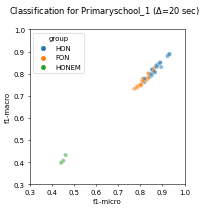

In [31]:
with open(filename_noext + '.tex', 'w') as f:
    gen.write_config(f, comment=comment, prefix='% ', sep='=')
    f.write('%\n% Embeddings:\n')
    for emb in embeddings.values():
        f.write(f'% {emb._id}={repr(emb.config)}\n')
    f.write('\n')
    stats4tex.to_latex(f, float_format="%.3f", index_names=False)
# export summary 
summarize('f1-macro').append(summarize('f1-micro')).to_csv(filename_noext + '.csv', sep='\t', encoding='utf-16')
# export plot
df = stats_df.copy().reset_index(drop=False)
df['group'] = df['embedding'].map(lambda x:x.split(' ')[0])
fig = plt.figure(figsize=(4, 4.3),dpi=50 if tiny else 400)
fig.suptitle('Classification for ' + gen._id.title() + ' ($\Delta$=' + delta_text + ')')
ax = sns.scatterplot(x='f1-micro', y='f1-macro', hue='group', data=df, ax=fig.gca(), alpha=0.5)
f1_min = min(df['f1-micro'].min(), df['f1-macro'].min())
f1_max = max(df['f1-micro'].max(), df['f1-macro'].max())
f1_min = np.floor(f1_min*10)/10
f1_max = np.ceil(f1_max*10)/10
ax.set_xlim(f1_min, f1_max)
ax.set_ylim(f1_min, f1_max)
ax.set_aspect(1)
ax.figure.savefig(filename_noext + '.png')

In [32]:
sorted_f1_micro = stats_df['f1-micro'].sort_values(ascending=False)
sorted_f1_micro.to_csv(filename_noext + '_f1-micro.csv', sep='\t', encoding='utf-16')
if verbose:
    sorted_f1_micro

In [33]:
sorted_f1_macro = stats_df['f1-macro'].sort_values(ascending=False)
sorted_f1_macro.to_csv(filename_noext + '_f1-macro.csv', sep='\t', encoding='utf-16')
if verbose:
    sorted_f1_macro

In [34]:
sorted_f1 = (stats_df['f1-micro'] + stats_df['f1-macro']).sort_values(ascending=False)
best_HON =sorted_f1[sorted_f1.index.map(lambda x:x[1].startswith('HON '))].index[0]
best_FON =sorted_f1[sorted_f1.index.map(lambda x:x[1].startswith('FON '))].index[0]
print('best HON model and embedding', best_HON)
print('best FON model and embedding', best_FON)

best HON model and embedding ('LR', 'HON DeepWalk')
best FON model and embedding ('LR', 'FON NetMF(W=2)')


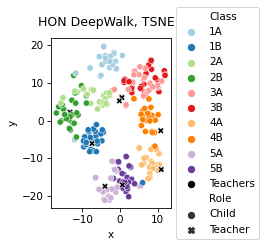

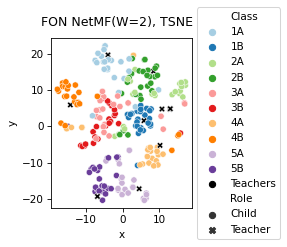

In [35]:
# export tsne visualization of best embeddings
plot_ev(embeddings[best_HON[1]].source, random_state=2, filename=f'{filename_noext}_tsne_hon.png')
plot_ev(embeddings[best_FON[1]].source, random_state=1, filename=f'{filename_noext}_tsne_fon.png')

# Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator
def create_confusion_matrix(ev: EmbeddingData, model: BaseEstimator, n_splits:int=5, n_repeat=10, plot:bool=False, title=None, target_name=metadata_name):
    if verbose: 
        print(ev._emb._id, model)
    X = ev.embedding.values
    y = ev[target_name].values
    classes = sorted(np.unique(y))
    y_true, y_pred=[], []
    for random_state in range(n_repeat): 
        kf = KFold(n_splits, shuffle=True, random_state=random_state)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_true.extend(y_test)
            y_pred.extend(model.predict(X_test))
    cm = confusion_matrix(y_true, y_pred, labels=classes) / n_repeat
    if plot:
        plt.figure(figsize=(6,4) if tiny else(7,5), dpi=50 if tiny else 100)
        if title is not None:
            plt.title(title)
        sns.heatmap(cm, annot=True, fmt='.1f', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
    return pd.DataFrame(cm, index=pd.MultiIndex.from_product([['True label'], classes]), 
                        columns=pd.MultiIndex.from_product([['Predicted label'], classes]))

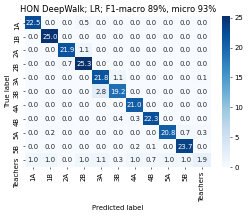

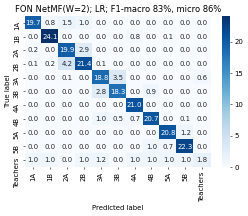

In [37]:
def export_confusion_matrix(best, filename=None, comment=comment):
    title = f'{best[1]}; {best[0]}; F1-macro {sorted_f1_macro[best]:.0%}, micro {sorted_f1_micro[best]:.0%}'
    emb = embeddings[best[1]]
    cf_para = dict(model=models[best[0]], n_splits=5, n_repeat=10)
    data = create_confusion_matrix(emb.source, plot=True, title=title, **cf_para)
    if filename is not None:
        plt.gcf().savefig(filename, bbox_inches='tight')
        with open(filename + '.txt','w') as f:
            comment_loc = (comment + ('' if comment=='' else '\n\n')
                + f'F1-macro\t{sorted_f1_macro[best]:f}\nF1-micro\t{sorted_f1_micro[best]:f}')
            emb.write_config(f, comment=comment_loc, prefix='', sep='\t')
            f.write('\nConfusion matrix:\n')
            for k,v in cf_para.items():
                f.write('%s\t%s\n' % (k,v))
            f.write('\n\nData:\n')
            f.write(data.to_csv(line_terminator='\n'))
export_confusion_matrix(best_HON, filename=f'{filename_noext}_confusion_hon.png')
export_confusion_matrix(best_FON, filename=f'{filename_noext}_confusion_fon.png')

# AUC / ROC

In [38]:
# https://stackoverflow.com/questions/45332410/sklearn-roc-for-multiclass-classification
from sklearn.metrics import roc_curve, auc
def create_auc_roc_old(ev: EmbeddingData, model: BaseEstimator, n_splits:int=5, n_repeat=10, title=None, plot:bool=False, target_name=metadata_name):
    X = ev.embedding.values
    #y = ev.target.values
    y = ev[target_name].values
    y_true, y_score = [], []
    for random_state in range(n_repeat): 
        kf = KFold(n_splits, shuffle=True, random_state=random_state)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_true.extend(y_test)
            y_score.append(model.decision_function(X_test)) # corresponding labels are in model.classes_
    y_score = np.concatenate(y_score, axis=0) # rbind(...)
    y_true = np.array(y_true)

    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i,c in enumerate(model.classes_):
        # roc_curve for y_true == c vs. rest
        fpr_, tpr_, _ = roc_curve(y_true == c, y_score[:,i])
        fpr[c] = fpr_
        tpr[c] = tpr_
        roc_auc[c] = auc(fpr_, tpr_)
    if plot:
        colors = sns.color_palette(palette, len(model.classes_))
        plt.figure(dpi=200)
        for c in model.classes_: # or sorted(np.unique(y))
            plt.plot(fpr[c], tpr[c], label='%s (area = %0.2f)' % (c,roc_auc[c]), color=colors.pop(0))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if title is None:
            plt.title('Receiver operating characteristic (1 vs rest) - %d times %d-fold CV' % (n_repeat, n_splits))
        else:
            plt.title(title)
        plt.legend(loc="lower right")
        #plt.show()

    return pd.Series(roc_auc, index=model.classes_, name='auc')#, fpr, tpr

In [39]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
def create_auc_roc(ev: EmbeddingData, model: BaseEstimator, n_splits:int=5, n_repeat=10, title=None, plot:bool=False, target_name=metadata_name, check=True):
    X = ev.embedding.values
    #y = ev.target.values
    y = ev[target_name].values
    y_true, y_prob = [], []
    for random_state in range(n_repeat): 
        kf = KFold(n_splits, shuffle=True, random_state=random_state)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_true.extend(y_test)
            y_prob.append(model.predict_proba(X_test)) # corresponding labels are in model.classes_
    y_prob = np.concatenate(y_prob, axis=0) # rbind(...)
    y_true = np.array(y_true)

    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i,c in enumerate(model.classes_):
        # roc_curve for y_true == c vs. rest
        fpr_, tpr_, _ = roc_curve(y_true == c, y_prob[:,i])
        fpr[c] = fpr_
        tpr[c] = tpr_
        roc_auc[c] = auc(fpr_, tpr_)
    if check:
        # "Area under ROC for the multiclass problem" acording to sklearn documentation
        # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
        macro_roc_auc_ovr = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
        # getting the 'macro'-average of roc_auc, which is supposed to calculate the same
        auc_mean = np.mean(list(roc_auc.values()))
        if abs(auc_mean - macro_roc_auc_ovr) > 1e-16:
            print('The indicidual AUCs are inconsistent with roc_auc_score(ovr,macro)=%f'%macro_roc_auc_ovr)
    if plot:
        colors = sns.color_palette(palette, len(model.classes_))
        plt.figure(dpi=50 if tiny else 200)
        for c in model.classes_: # or sorted(np.unique(y))
            plt.plot(fpr[c], tpr[c], label='%s (area = %0.3f)' % (c,roc_auc[c]), color=colors.pop(0))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        if title is None:
            plt.title('Receiver operating characteristic (1 vs rest) - %d times %d-fold CV' % (n_repeat, n_splits))
        else:
            plt.title(title)
        plt.legend(loc="lower right")
        #plt.show()

    return pd.Series(roc_auc, index=model.classes_, name='auc')#, fpr, tpr

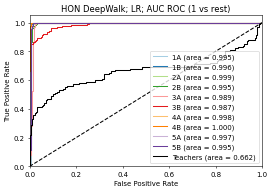

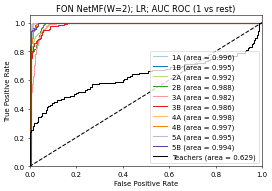

In [40]:
def export_auc_roc(best, filename=None, comment=comment):
    title = f'{best[1]}; {best[0]}; AUC ROC (1 vs rest)'
    emb = embeddings[best[1]]
    auc_para = dict(model=models[best[0]], n_splits=5, n_repeat=10)
    data = create_auc_roc(emb.source, title=title, plot=True, **auc_para)
    if filename is not None:
        plt.gcf().savefig(filename, bbox_inches='tight')
        with open(filename + '.txt','w') as f:
            comment_loc = (comment + ('' if comment=='' else '\n\n')
                + f'F1-macro\t{sorted_f1_macro[best]:f}\nF1-micro\t{sorted_f1_micro[best]:f}\n'
                + f'macro_roc_auc_ovr\t{data.mean():f}')
            emb.write_config(f, comment=comment_loc, prefix='', sep='\t')
            f.write('\nAUC ROC:\n')
            for k,v in auc_para.items():
                f.write('%s\t%s\n' % (k,v))
            f.write('\n\nData:\n')
            f.write(data.to_csv(line_terminator='\n'))
export_auc_roc(best_HON, filename=f'{filename_noext}_auc-roc_hon.png')
export_auc_roc(best_FON, filename=f'{filename_noext}_auc-roc_fon.png')

## Entropy

In [41]:
entropies = dict()
for key in gen.rule_keys:
    tmp = 0
    for _,_,prob in gen.transition_probs(start=key):
        tmp += prob * math.log2(prob)
    entropies[key] = -tmp

In [42]:
entropy_data = [
    dict(start=str(start), entropy=entropy,
         parent_entropy=entropies[start[:-1]],
         start_len=len(start)
        )
    for start,entropy in entropies.items() if len(start)>0
]
entropy_data = pd.DataFrame(entropy_data).set_index('start')
entropy_data['entropy_ratio'] = entropy_data['entropy']/entropy_data['parent_entropy']

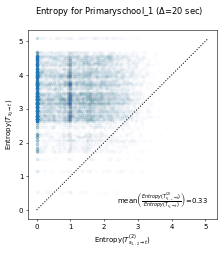

In [43]:
entropy_data2 = entropy_data[entropy_data['start_len']==2]
avg_ratio_desc = 'mean$\\left(\\frac{Entropy(T^{(2)}_{s_{1..2}\\rightarrow t})}{Entropy(T_{s_2\\rightarrow t})}\\right)$=%.2f' % entropy_data["entropy_ratio"].mean()
fig = plt.figure(figsize=(5,5), dpi=50 if tiny else 400)
alpha = 0.01 if filename == 'primaryschool_1.csv' else 0.1
ax = entropy_data2.plot.scatter('entropy','parent_entropy', alpha=alpha, ax=fig.gca())
max_entropy = entropy_data2['parent_entropy'].max()
ax.set_aspect(1)
ax.set_xlabel('Entropy($T^{(2)}_{s_{1..2}\\rightarrow t}$)')
ax.set_ylabel('Entropy($T_{s_2\\rightarrow t}$)')
ax.plot([0, max_entropy], [0, max_entropy], 'k:')
ax.figure.suptitle('Entropy for ' + gen._id.title() + ' ($\\Delta$=' + delta_text + ')')
ax.annotate(avg_ratio_desc, (max_entropy,0), ha='right', va='bottom')
fig.savefig(f'tmp/{os.path.splitext(filename)[0]}_entropy.png')

In [44]:
entropy_data['entropy'].mean()

1.1137836903957954

In [45]:
entropy_data['parent_entropy'].mean()

3.5018416387267424